In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['Price'] = boston.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X = df.drop('Price',1)
y = df['Price']

### Feature Selection

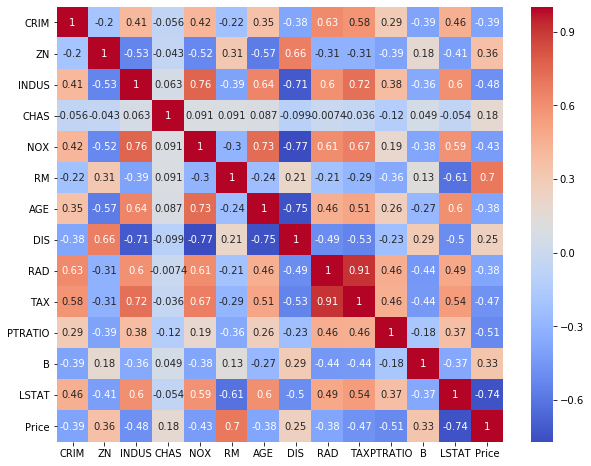

In [7]:
# Method 1: Using Correlation

plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap='coolwarm',annot=True)
plt.show()

In [8]:
cor = df.corr()
cor_target = np.abs(cor.Price)
cor_target

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

In [9]:
imp_features = cor_target[cor_target>=0.5]
imp_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

In [10]:
df.shape

(506, 14)

In [11]:
# Method 2: Using Recursive Feature Elimination (RFE)

model = LinearRegression()

## initialize RFE
rfe = RFE(model, 10)
rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True False  True False
  True]
[1 1 1 1 1 1 4 1 1 2 1 3 1]


In [12]:
pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)),
            columns = ['cols', 'select', 'rank'])

,cols,select,rank
0,CRIM,True,1
1,ZN,True,1
2,INDUS,True,1
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,4
7,DIS,True,1
8,RAD,True,1
9,TAX,False,2


In [13]:
y_pred = rfe.predict(X)
print("r2:", r2_score(y, y_pred))
print("MSE:", np.sqrt(mean_squared_error(y, y_pred)))

r2: 0.728290740634622
MSE: 4.789318853359596


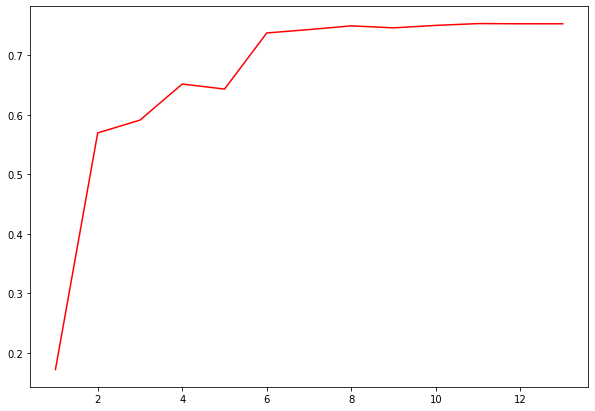

In [14]:
nof_cols = np.arange(1,14)
score_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)
model = LinearRegression()

for i in range(13):
    rfe = RFE(model, i+1)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    score = r2_score(y_test, y_pred)
    score_list.append(score)

plt.figure(figsize=(10,7))
plt.plot(nof_cols, score_list, color='r')
plt.show()

In [15]:
score_list

[0.1722061779293681,
 0.5698701732268368,
 0.5913715623120596,
 0.6520076039054727,
 0.6435331172360481,
 0.7378303042293388,
 0.7435257602949954,
 0.7498014640274302,
 0.746416514765494,
 0.7505629330135261,
 0.75360602889326,
 0.7532530125852642,
 0.7532417995961485]

#### Let's run RFE with nine features.

In [16]:
rfe = RFE(model, 9)
rfe.fit(X, y)
pd.DataFrame(list(zip(X.columns, rfe.support_,rfe.ranking_)),columns=['cols','select','rank'])

,cols,select,rank
0,CRIM,True,1
1,ZN,False,2
2,INDUS,True,1
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,5
7,DIS,True,1
8,RAD,True,1
9,TAX,False,3


In [17]:
y_pred = rfe.predict(X)
print("r2:", r2_score(y, y_pred))
print("MSE:", np.sqrt(mean_squared_error(y, y_pred)))

r2: 0.72434488837625
MSE: 4.823969545452711


### Forward and Backward Selection

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [19]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 112)

sfs1 = sfs(model, k_features = 10, forward = True, scoring = 'r2', cv=3)
sfs1 = sfs1.fit(X_train, y_train)

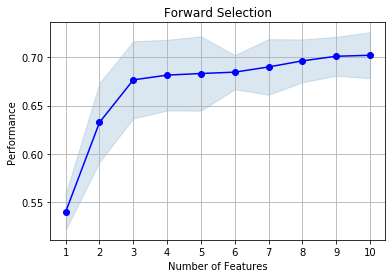

In [20]:
fig = plot_sfs(sfs1.get_metric_dict())
plt.title("Forward Selection")
plt.grid()
plt.show()

In [21]:
sfs1.k_feature_names_

('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')

In [23]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 112)

sfs1 = sfs(model, k_features = 8, forward = True, scoring = 'r2', cv=3)
sfs1 = sfs1.fit(X_train, y_train)

sfs1.k_feature_names_

('CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT')

In [27]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 112)

sbs = sfs(model, k_features = 1, forward = False, scoring = 'r2', cv=3)
sbs = sbs.fit(X_train, y_train)


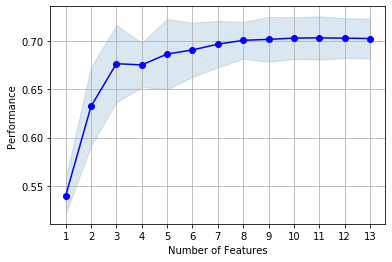

In [28]:
fig = plot_sfs(sbs.get_metric_dict())
plt.grid()
plt.show()

In [29]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 112)

sbs = sfs(model, k_features = 9, forward = False, scoring = 'r2', cv=3)
sbs = sbs.fit(X_train, y_train)

sbs.k_feature_names_

('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')

### Elastic Net Regularization

In [36]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.datasets import load_boston

In [37]:
boston = load_boston()
X = pd.DataFrame(data=boston.data, columns = boston.feature_names)
y = boston.target

<Figure size 720x576 with 0 Axes>

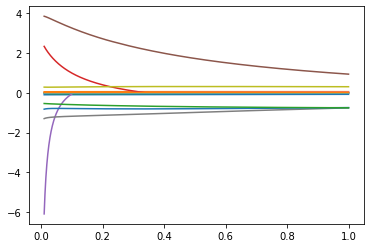

In [43]:
en_alphas = np.logspace(-2, 0, 200)
model = ElasticNet()
coefs = []

for i in en_alphas:
    model.set_params(alpha = i)
    model.fit(X,y)
    coefs.append(model.coef_)

fig, ax = plt.subplots()
ax.plot(en_alphas, coefs)
plt.show()

In [46]:
en_alphas = np.logspace(-2, 0, 1000)
en_cv = ElasticNetCV(alphas = en_alphas, cv=3)
en_cv.fit(X, y)

ElasticNetCV(alphas=array([0.01      , 0.0100462 , 0.01009262, 0.01013925, 0.0101861 ,
       0.01023317, 0.01028045, 0.01032795, 0.01037567, 0.01042361,
       0.01047177, 0.01052015, 0.01056876, 0.01061759, 0.01066665,
       0.01071593, 0.01076545, 0.01081519, 0.01086516, 0.01091536,
       0.01096579, 0.01101646, 0.01106736, 0.0111185 , 0.01116987,
       0.01122148, 0.01127333, 0.01132541, 0.01137774, 0.01143031,
       0....
       0.9375015 , 0.94183315, 0.94618482, 0.95055659, 0.95494856,
       0.95936083, 0.96379348, 0.96824661, 0.97272032, 0.9772147 ,
       0.98172984, 0.98626585, 0.99082281, 0.99540083, 1.        ]),
             copy_X=True, cv=3, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [47]:
en_cv.alpha_

0.326222200971167

#### This is the best alpha.